# Project Title: **Predicting Customer Churn – From Gut Feel to Data-Driven Precision**

In our last quarterly review, the numbers told a familiar story: strong acquisition, flat growth. For every customer we bring in, another quietly leaves. No complaints. No warnings. Just churn.

That’s when we reframed the problem, not as a marketing issue, but as a prediction challenge.

**What if we could know, in advance, who’s likely to churn—and why?**

Using historical data and machine learning, we built a predictive model that does just that. It identifies high-risk customers before they churn and uncovers the exact factors pushing them away. No more blanket discounts for everyone—only targeted retention actions where they matter most, saving cost and maximizing impact.

This project isn’t just about plugging a leak. It’s about transforming how ConnectTel sees and serves its customers proactively, strategically, and profitably.

## 1. Data Loading & Initial Inspection
    a. Import pandas, numpy, and other necessary libraries.
    b. Load the telecom_churn.csv file into a DataFrame df.
    c. Perform initial checks: df.head(), df.info(), df.describe(), df.nunique()
    d. Inspect rows which have null values, also columns that contains null values.


In [1]:
# a. import pandas Pandas, Numpy, Seaborn and Matplotlib

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# b.load Data sets

In [4]:
df = pd.read_csv(r'C:\Users\63927\Documents\Jupyter_lab_notebook_files\Telco-Customer-Churn\data\Telco-Customer-Churn.csv')

In [5]:
# c. inspect data
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
# c. inspect the data: Check data types and potential null values

In [7]:
df.info()
# the total charges has to be numeric but becomes an object lets inspect later
# the total row number is equal to Non-Null Count so there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# c. inspect the data: Lets see some descriptive statistics to have a better understanding of the data

In [9]:
df.describe()

#so on average customer total tenure is 32 months(2 years and 8 months) and the longest is 72 months (6 years)
# the average monthly subscription is $64.7 and can go as high as $118.75 but can go as low as $18.2

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
# c. Lets see how graphically how the number of customer are distributed in their tenureship

<Axes: xlabel='tenure', ylabel='Count'>

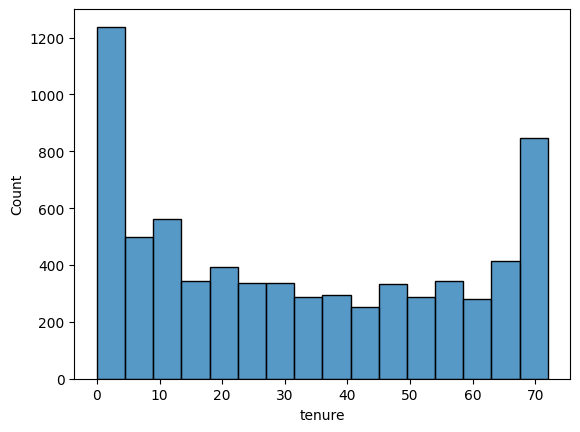

In [11]:
sns.histplot(data = df, x = 'tenure')
#ok so most people are fairly new customers but its surprising that most of the people (800) are fair long time customers

In [12]:
# c. inspect the data: Lets see how graphically how the number of customer are distributed in their subscription

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

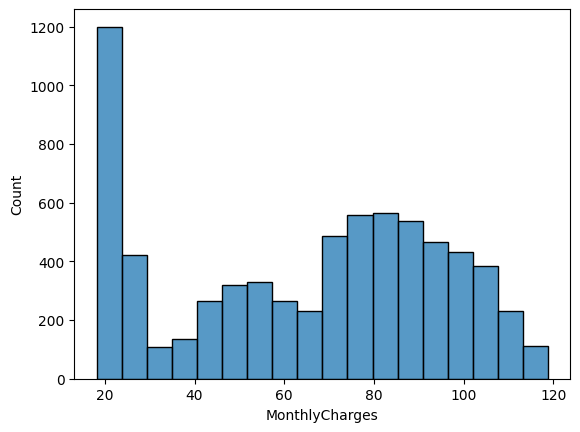

In [13]:
sns.histplot(data = df, x = 'MonthlyCharges')

#So most of the customers are at subscribing at the lowest prices

In [14]:
# c.inspect the data: Lets count the nun unique values so we can plan on how we handle them later

In [15]:
df.nunique()
#Interestingly there are categorical datas that has only 3 values

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [16]:
# c.inspect the data: Lets inspect what exactly are the datas that are unique to the columns that containss 3 unique values so we can grasp how to handle them later

columnn_3_unique = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']

for column in columnn_3_unique:
    print(f'\n---- {column}----')
    print(df[column].unique()) #Iterate to the column list columnn_3_unique so dont have to do one by one
    
# Some column that are offerings have a separate data for 'No internet service' we can just convert this to 'No' later, as we already have a column for internet service


---- MultipleLines----
['No phone service' 'No' 'Yes']

---- InternetService----
['DSL' 'Fiber optic' 'No']

---- OnlineSecurity----
['No' 'Yes' 'No internet service']

---- OnlineBackup----
['Yes' 'No' 'No internet service']

---- DeviceProtection----
['No' 'Yes' 'No internet service']

---- TechSupport----
['No' 'Yes' 'No internet service']

---- StreamingTV----
['No' 'Yes' 'No internet service']

---- StreamingMovies----
['No' 'Yes' 'No internet service']

---- Contract----
['Month-to-month' 'One year' 'Two year']


In [17]:
# d. Inspect rows which have null values, also columns that contains null values.

In [18]:
df.isnull().all(axis=1).sum() #Check rows which contains all null values

np.int64(0)

In [19]:
df.isnull().sum()  #Check rows for each column

# no null values as expected (infered from info)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 2. Data Cleaning & Preparation
•	Goal: **Transform the raw data into a fully numeric, machine-learning-ready format.**

    a. Handle nulls.
    b. Drop columns that are not needed for the model
    c. Handle full-row duplicates with .drop_duplicates()
    d. Fix the TotalCharges column from object to float.
    e. Convert binary categorical columns (e.g., Partner, Dependents, Churn) to 0s and 1s using .map() with a dictionary.
    f. One-Hot Encode the remaining multi-category text columns (e.g., InternetService, Contract) using the "create, drop, join" pattern with pd.get_dummies() to avoid multicollinearity.

In [20]:
# a. Handle nulls

#no null values based on the inspection

In [21]:
# Drop columns that are not needed for the model. customer ID will not explain the Churn so we have to remove this
df.drop(columns='customerID', axis =1, inplace = True)

In [22]:
df.info() #check if customerID column is dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [23]:
# b. Handle full-row duplicates with .drop_duplicates()

In [24]:
df.duplicated().sum()#Shows how many duplicates
#no duplicate for this data set

np.int64(22)

In [25]:
#based on the info there should be no null values on all columns
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
# c. Fix the TotalCharges column from object to float.

**Note: Error will after for the next code cell. This is essential for trouble shooting**

In [27]:
#based on previous error at 488 index we can use this to inspect the 'TotalCharges' column
df.loc[488]

#empty space is causing our conversion to numeric to fail

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [28]:
# Drop the columns with empty space
df = df[df['TotalCharges'] != " "]

In [29]:
# Convert again to numeric. if there is an error inspect again
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

df['TotalCharges']
#no errors and the data type alread float64
# We can do pd.to_numeric(df['TotalCharges'], errors = 'coerce') to return nulls to those values that cannot be converted but i prefer to inspect the data why it cannot be turned to numbers.

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [30]:
# e. Convert to binary the categorical columns with 2 unique values

In [31]:
# based on our last inspection we need to convert "No Internet Service" to "No"
df.replace('No internet service', 'No', inplace = True)

df.nunique() # Show number of unique values after after replacing 'No internet service' with 'No'

# We can now see that some of the columns that had 3 unique values now has only 2 we can now convert these into boolean


gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [32]:
columns_to_bool = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn'] # create list for columns that only has 2 unique catergories

bool_dict ={ 'Yes': True, 'No':False, 1 : True, 0: False} # Create a dictionary for conversion to bool

for column in columns_to_bool: #Iterate on the list of columns_to_bool to convert each column one by one
    df[column] = df[column].map(bool_dict)

In [33]:
df.info()

#below us that we successfully converted all columns from columns_to_bool  to boolean

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   bool   
 2   Partner           7032 non-null   bool   
 3   Dependents        7032 non-null   bool   
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   bool   
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   bool   
 9   OnlineBackup      7032 non-null   bool   
 10  DeviceProtection  7032 non-null   bool   
 11  TechSupport       7032 non-null   bool   
 12  StreamingTV       7032 non-null   bool   
 13  StreamingMovies   7032 non-null   bool   
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   bool   
 16  PaymentMethod     7032 non-null   object 
 17  

In [34]:
# f. One-Hot Encode the remaining multi-category columns (e.g. gender , InternetService, Contract). 

In [35]:
#Create a list to what need to be one hot encode
cols_to_encode = [
    'gender',
    'MultipleLines',
    'InternetService',
    'Contract',
    'PaymentMethod']# Need to include some columns

dummy_df=pd.get_dummies(df[cols_to_encode], drop_first=True) #Create a dataframe that contains the result from One-Hot Encode. Will drop the first(numerically or alphabetically) to prevent multicolinearity

df.drop(columns = cols_to_encode, inplace = True) # drop the original column

df = pd.concat([df, dummy_df], axis=1) #Joins the dummy_df that we created to our original dataframe

df

#Now we have 25 total columns compared to the original 20

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,True,False,1,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,34,True,True,False,True,False,False,...,True,False,False,False,False,True,False,False,False,True
2,False,False,False,2,True,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,False,False,False,45,False,True,False,True,True,False,...,True,True,False,False,False,True,False,False,False,False
4,False,False,False,2,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,True,True,24,True,True,False,True,True,True,...,True,False,True,False,False,True,False,False,False,True
7039,False,True,True,72,True,False,True,True,False,True,...,False,False,True,True,False,True,False,True,False,False
7040,False,True,True,11,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
7041,True,True,False,4,True,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True


In [36]:
df.info()
# If we look now on our data frame, we dont have any non numeric or non boolean values. This is datatypes are now usable for our model.

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   bool   
 1   Partner                                7032 non-null   bool   
 2   Dependents                             7032 non-null   bool   
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   bool   
 5   OnlineSecurity                         7032 non-null   bool   
 6   OnlineBackup                           7032 non-null   bool   
 7   DeviceProtection                       7032 non-null   bool   
 8   TechSupport                            7032 non-null   bool   
 9   StreamingTV                            7032 non-null   bool   
 10  StreamingMovies                        7032 non-null   bool   
 11  Paperless

## 3. Model Preparation
**Goal: Prepare the cleaned data for Scikit-learn**

    a. Separate the data into features (X) and the target (y)6.
    b. Split the data into training and testing sets using train_test_split, ensuring you set a random_state for reproducibility.


In [37]:
# a. Separate the data into features (X) and the target (y). The target is Churn column since this is what we want to predict

In [38]:
#Create  a data set for x features
X = df.drop(columns = 'Churn', axis =1)
X

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,False,True,False,1,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,34,True,True,False,True,False,False,...,True,False,False,False,False,True,False,False,False,True
2,False,False,False,2,True,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,False,False,False,45,False,True,False,True,True,False,...,True,True,False,False,False,True,False,False,False,False
4,False,False,False,2,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,True,True,24,True,True,False,True,True,True,...,True,False,True,False,False,True,False,False,False,True
7039,False,True,True,72,True,False,True,True,False,True,...,False,False,True,True,False,True,False,True,False,False
7040,False,True,True,11,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
7041,True,True,False,4,True,False,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True


In [39]:
#Create y target
y = df['Churn']
y

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040    False
7041     True
7042    False
Name: Churn, Length: 7032, dtype: bool

In [40]:
# Prepare the train and test- data

In [41]:
import sklearn

In [42]:
#import train test split to make a random split of the data
from sklearn.model_selection import train_test_split #get the card train_test_split 

In [43]:
# b. Split the data into training and testing sets using train_test_split, ensuring you set a random_state for reproducibility.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size =0.2)# this will split train data(80%) and (20%)

In [45]:
X_train.shape

(5625, 24)

In [46]:
X_test.shape

#Shows that we successfuly split the datas in to 80 and 20 proportion

(1407, 24)

## 4. Creating the Baseline Model
	**Goal: Train, predict, and evaluate our based model to be set a standard for improvement.**

    a. Build a Pipeline that includes a StandardScaler and a baseline LogisticRegression mode.
    b. Fit the pipeline and evaluate its performance using classification_report and a confusion_matrix.

In [47]:
# a. Build a Pipeline that includes a StandardScaler and a baseline LogisticRegression mode.

In [48]:
# import the model will use

In [49]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

In [50]:
#import Pipeline, StandardScaler, ColumnTransformer 

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [52]:
# identify the columns that are numerical. This step is needed to isolote continuous values so they are the only one that will undergo the scaling process

In [53]:
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()# Group columns which are numerics
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [54]:
# Create preprocessor object

In [55]:
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features)], remainder = 'passthrough') 

In [56]:
#Create the pipeline

In [57]:
pipeline_LR_model = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42))])

In [58]:
# train the model

In [59]:
pipeline_LR_model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [60]:
#Test our model with our test data set
y_pred_LR = pipeline_LR_model.predict(X_test)

In [61]:
#import metrics to test accuracy
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test,y_pred_LR)

0.7889125799573561

In [63]:
# for a more comprehensive report lets import classification_report and confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [64]:
print(classification_report(y_test,y_pred_LR))

# this is will be the base line for our model improvement

              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Based on the score we can concurred 3 things from the model
1. We have a recall   for False of 89% meaning only we identify only 89% of the total customer that did not churn
2. We have a precision for False of 84% meaning when we identify a customer that they will not churn we are correct 84%
3. We have a recall   for True of 52% meaning only we identify only 52% of the total customer that unsubscribe. **This also means that we missed a total of 48% customer that actually churn!**. Based on our set goal, This is the most important metrics we should focus on
4. We have a precision for True of 62% meaning when we identify a customer will churn we are correct 62%. That means 38% are actually not unsubscribing. So if we put some discount to these people we are allocating resources that we dont have to.

In [65]:
LR_cm = confusion_matrix(y_test, y_pred_LR)

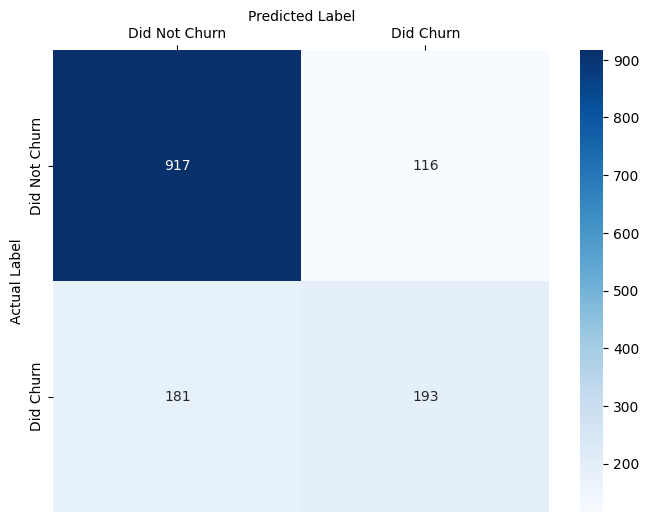

In [66]:
# 1. Create the Figure and Axes
fig, ax = plt.subplots(figsize=(8, 6))

# 2. Create the heatmap on our axes
sns.heatmap(LR_cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Did Not Churn', 'Did Churn'],
            yticklabels=['Did Not Churn', 'Did Churn'])

# 3. Apply your excellent suggestions
# Your request: Remove the title
ax.set_title('') 

# Your request: Move the x-axis label to the top
ax.xaxis.set_label_position('top') 
ax.set_xlabel('Predicted Label')

# Your request: Move the x-axis ticks to the top
ax.xaxis.tick_top()

ax.set_ylabel('Actual Label')

plt.show()

Based on the confusion matrix:
1. out of 374 that leave we only identified 193 that will leave
2. and 116 of them, we wrongly accused of leaving

# 5. Improving the model

    **Goal: To increase the Churning identification performance (recall) of our model .**

    a. Build a second Pipeline with a RandomForestClassifier.
    b. Perform Hyperparameter Tuning on the Random Forest pipeline using GridSearchCV to find the best model, optimizing specifically for recall.
    c. Evaluate the final, best-tuned model.


In [67]:
# a. Build a second Pipeline with a RandomForestClassifier.

In [68]:
pipeline_RFC_model = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', RandomForestClassifier(random_state=42))])

In [69]:
#GridSearchCV

In [70]:
#Import GridSearcCV
from sklearn.model_selection import GridSearchCV


In [71]:
# b. Perform Hyperparameter Tuning on the Random Forest pipeline using GridSearchCV to find the best model, optimizing specifically for recall.

In [72]:
#Create ad dictionary for our parameter

In [73]:
param_grid={'classifier__n_estimators':[100, 200, 300, 400, 500], 'classifier__max_depth':[5, 10, None], 'classifier__class_weight':['balanced']} # These are our tuning paremeters

In [74]:
#Create Grid Search Object

In [75]:
grid_search = GridSearchCV(estimator = pipeline_RFC_model, scoring = 'recall', cv=4, param_grid =param_grid)

In [76]:
grid_search.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__class_weight': ['balanced'], 'classifier__max_depth': [5, 10, ...], 'classifier__n_estimators': [100, 200, ...]}"
,scoring,'recall'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...)]"


In [77]:
y_pred_RFC = grid_search.predict(X_test)

In [78]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

       False       0.91      0.70      0.79      1033
        True       0.50      0.81      0.62       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.73      0.75      1407



In [79]:
cm = confusion_matrix(y_test, y_pred_RFC)

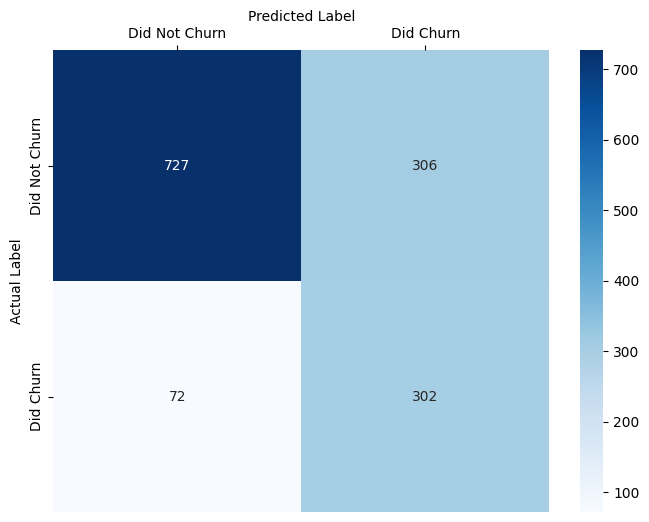

In [80]:
# 1. Create the Figure and Axes
fig, ax = plt.subplots(figsize=(8, 6))

# 2. Create the heatmap on our axes
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Did Not Churn', 'Did Churn'],
            yticklabels=['Did Not Churn', 'Did Churn'])

# 3. Apply your excellent suggestions
# Your request: Remove the title
ax.set_title('') 

# Your request: Move the x-axis label to the top
ax.xaxis.set_label_position('top') 
ax.set_xlabel('Predicted Label')

# Your request: Move the x-axis ticks to the top
ax.xaxis.tick_top()

ax.set_ylabel('Actual Label')

plt.show()

In [81]:
# Getting the info on the trained model 

In [82]:
# Assessing which features contributed the most.

In [83]:
best_pipeline= grid_search.best_estimator_
best_pipeline

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [84]:
#Get the best model/Classifier from the pipeline

In [85]:
rf_model =best_pipeline.named_steps['classifier']
rf_model

,n_estimators,500
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [86]:
#Get Feature names

In [87]:
preprocessor = best_pipeline.named_steps['preprocessor']
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['num__tenure', 'num__MonthlyCharges', 'num__TotalCharges',
       'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__PhoneService',
       'remainder__OnlineSecurity', 'remainder__OnlineBackup',
       'remainder__DeviceProtection', 'remainder__TechSupport',
       'remainder__StreamingTV', 'remainder__StreamingMovies',
       'remainder__PaperlessBilling', 'remainder__gender_Male',
       'remainder__MultipleLines_No phone service',
       'remainder__MultipleLines_Yes',
       'remainder__InternetService_Fiber optic',
       'remainder__InternetService_No', 'remainder__Contract_One year',
       'remainder__Contract_Two year',
       'remainder__PaymentMethod_Credit card (automatic)',
       'remainder__PaymentMethod_Electronic check',
       'remainder__PaymentMethod_Mailed check'], dtype=object)

In [88]:
#get the contribution score for each features

In [89]:
importances = rf_model.feature_importances_
feature_importance_series = pd.Series(importances, index = feature_names)

In [90]:
feature_importance_series.sort_values(ascending = False) # shows the score of each features

num__tenure                                         0.184303
remainder__Contract_Two year                        0.156424
remainder__InternetService_Fiber optic              0.127437
num__TotalCharges                                   0.108165
num__MonthlyCharges                                 0.081633
remainder__PaymentMethod_Electronic check           0.069789
remainder__InternetService_No                       0.066482
remainder__Contract_One year                        0.052118
remainder__OnlineSecurity                           0.035081
remainder__TechSupport                              0.027757
remainder__PaperlessBilling                         0.018028
remainder__Dependents                               0.012043
remainder__SeniorCitizen                            0.009340
remainder__Partner                                  0.006802
remainder__StreamingTV                              0.006280
remainder__StreamingMovies                          0.006186
remainder__OnlineBackup 

In [91]:
correlation_matrix = df.corr()

In [92]:
feature_importance_series.sort_values(ascending = False).head(10)

num__tenure                                  0.184303
remainder__Contract_Two year                 0.156424
remainder__InternetService_Fiber optic       0.127437
num__TotalCharges                            0.108165
num__MonthlyCharges                          0.081633
remainder__PaymentMethod_Electronic check    0.069789
remainder__InternetService_No                0.066482
remainder__Contract_One year                 0.052118
remainder__OnlineSecurity                    0.035081
remainder__TechSupport                       0.027757
dtype: float64

## Conclusion

This project began with a common but critical business challenge: customers were silently churning, and the company had no way to predict or prevent it. By reframing churn as a **data science problem**, we were able to move from guesswork to informed, targeted action.

Through systematic exploration, model development, and tuning, we achieved a **recall of 81% for churners** using a Random Forest model, an essential improvement from our baseline model’s 52%. This metric directly supports the business goal: **proactively identifying and retaining high-risk customers.**

Beyond prediction, the model revealed **key churn drivers** such as short tenure, contract type, and internet service type—insights that the business can act on immediately through tailored retention strategies.

### Final Takeaways:
- Machine learning enables precise customer segmentation for smarter decision-making.
- Strategic data cleaning and feature engineering significantly impact model performance.
- Business context, not just accuracy, should guide model evaluation and deployment.

This project demonstrates how data science can transform a lagging KPI into a **competitive advantage** with measurable, bottom-line results.

